# <span style="color:green"> ESERCITAZIONE 10 </span>

### <span style="color:blue">  Esercizio 10.1 </span> 
<span style="color:blue"> 1. Parallelizza con la libreria MPI il tuo codice che contiene l'algoritmo genetico GA, per poter risolvere il problema del commesso viaggiatore, eseguendo $10$ ricerche in parallelo del percorso più breve. Ogni nodo del processore deve fare con l'algoritmo genetico, una ricerca indipendente del percorso migliore e ogni $N_{migr}$ generazioni i nodi-continenti dovranno scambiare a caso tra di loro il miglior individuo-percorso del momento. </span> 

L'obiettivo di questa Esercitazione è **parallelizzare il codice** contenente l'algoritmo genetico scritto nell'Esercitazione $9$ per **risolvere il problema del commesso viaggiatore**. In questo modo **ciascun nodo (core) del processore risolverà il problema** e ognuno troverà la sua soluzione. 

### Processo in parallelo

Fino alla scorsa Esercitazione, abbiamo risolto tutti i problemi sfruttando il processore del computer come un unico blocco: un problema, un'entità che lo risolve. Finché si tratta di problemi di piccole dimensioni va bene così. Immaginiamo che un giorno, ci chiederanno di **risolvere un problema** per quale devono essere prodotti o analizzati **miliardi di dati**: se lo svolgesse una sola entità ci vorrebbero giorni o settimane.

A questo fine è fondamentale osservare che il **processore** del computer con quale lavoriamo **è costituito da nodi ciascuno dei quali può lavorare come una singola entità** se si danno loro le istruzioni giuste. Questo vuol dire **risolvere un problema in parallelo**: prima **si suddivide** l'intero **problema tra i nodi** del processore, dopo **ognuno** di loro **risolve il suo compito in maniera individuale** e infine **si mettono insieme** tutti i **risultati dei singoli** processi. 

La **parallelizzazione** di un algoritmo **è un processo metauristico**, ossia ispirato a degli esempi che esistono nella natura. Nel regno animale possiamo pensare ad un cervello costituito dai **neuroni**, ciascuno dei quali elabora separatamente un pezzo di informazione, per poi rimetterla tutta insieme e comprenderla, oppure alle **cellule**, ciascuna delle quali trasporta le sostanze nutrienti fondamentali per la vita. Nel regno vegetale possiamo pensare alle **radici** di un albero, ciasuna delle quali assorbe l'acqua e i sali minerali dal terreno, fondamentali per la vita dell'albero, oppure alle **foglie** dell'albero che trasformano le sostanze assorbite dal terreno, in modo da renderle fruibili e nutritive per l'albero. 

### Come si effettua la parallelizzazione e i suoi vantaggi

Per parallelizzare un algoritmo è necessario sfruttare la libreria **MPI**, **Message Passing Interface**, che è stata scritta per C++, per Python e per Fortran. Esistono diversi modelli di programmazione parallela: quella che noi useremo è la **SPMD**, **Single Program Multiple Data**, ossia lo **stesso programma** viene svolto da ciascun nodo, ciascuno di loro elaborerà **dati** di entrata **diversi** e di conseguenza fornirà dati di uscita diversi. 

L'utilizzo di un programma scritto in parallelo comporta tre vantaggi. 

1. **Risparmio di tempo**. Se per eseguire un programma il processore impiega un tempo $T$, se suddividiamo il compito per ciascuno degli $n$ nodi del processore, ciascuno dei quali svolge la sua porzione nello stesso tempo, allora il **tempo** totale di esecuzione sarà $\simeq T/n$ che è **minore** di $T$. 
2. **Diversificazione**. Ogni nodo che svolge una porzione del compito sta svolgendo una **ricerca indipendente** della soluzione del problema. In questo esercizio diremo che **ogni nodo è un continente**, perché **in ciascuno di loro avviene la ricerca del percorso più breve** e ognuno trova il suo. 
3. **Intensificazione**. Per cercare la soluzione al problema si usa **l'algoritmo genetico che va avanti per generazioni**, fino a trovare la soluzione più giusta.

Grazie alla parallelizzazione del codice è possibile introdurre il concetto di **migrazione**. Abbiamo detto che ogni nodo può essere chiamato continente perché da ciascuno di essi, dopo un certo numero di generazioni, **il migliore** di quel momento **migra verso un altro continente**. I nodi si scambiano tra di loro i migliori casualmente. Questo porta **varietà** nella popolazione che dovrebbe **cambiare in meglio**, visto che chi entra è un elemento di qualità. 

Nelle prime generazioni ogni continente avrà il suo best che non sarà il migliore in assoluto. Andando avanti nelle generazioni e grazie alle migrazioni, **tutti i continenti avranno modificato il loro best**. Saranno tutti sempre più simili tra di loro e più vicini possibile alla soluzione esatta del problema.

### Gestione dei nodi

Per eseguire il codice in parallelo è opportuno chiedersi: **quanti nodi è giusto usare**? Se il processore è costituto da $n$ nodi, è corretto usare $n-1$ nodi. Questo perché su un nodo gira il sistema operativo del computer. Se si impiegano tutti i nodi, su uno di loro gireranno contemporaneamente sia la porzione di compito relativa al codice in parallelo, sia il sistema operativo che fa funzionare tutto il computer. Di conseguenza questo nodo ci metterà più tempo a svolgere il suo compito, essendo già impegnato in altre faccende e consegnerà i suoi risultati in ritardo. 

Una delle caratteristiche della **chiamata collettiva** del gruppo dei nodi è che **tutti devono rispondere** alla chiamata: il codice resta bloccato finché tutti non hanno comunicato i loro risultati. Solo allora il codice si sblocca e va avanti con le istruzioni successive. Quindi se un nodo è più lento a comunicare i suoi risultati, rallenta tutto il processo e fare la parallelizzazione non sarà servito a nulla. 

Per questo è bene, quando si desidera svolgere un processo in parallelo, **lasciare libero almeno un nodo** e suddividere il compito tra tutti gli altri. Per fare questo basta comunicare al codice il numero di nodi che si desidera usare, prestando attenzione che sia inferiore al numero di nodi totali del processore. 

Come facciamo ad essere sicuri che il nodo che sarà escluso dal processo in parallelo è proprio quello su cui gira il sistema operativo? Quando arriva la chiamata collettiva per prendere parte al processo, i **nodi** fino a quel momento **disoccupati rispondono con la stessa velocità** e riescono tutti ad ottenere un posto nel processo. Il **nodo su cui gira il sistema operativo è più lento**, essendo già preso da altre faccende e quando finalmente riesce a rispondere alla chiamata è ormai troppo tardi: tutti i posti nel processo sono già stati assegnati e lui è rimasto fuori. 

### TSP con le capitali d'America e con i capoluoghi d'Italia

Ho applicato il codice che risolve il problema del commesso viaggiatore a due esempi concreti: unire con il percorso più breve possibile prima le capitali degli Stati Uniti d'America poi i capoluoghi di provincia d'Italia. Il passaggio successivo sarà modificare il codice in modo che possa essere eseguito in parallelo. 

1. **America**. Numero di città $=50$, numero di individui della popolazione $=700$, numero di generazioni $=400$, tempo di esecuzione $=3$ minuti.
2. **Italia**. Numero di città $=110$, numero di individui della popolazione $=1300$, numero di generazioni $=900$, tempo di esecuzione $=36$ minuti.

Nel problema delle capitali degli Stati Uniti d'America il codice trova il best alla generazione $340$ e per il problema dei capoluoghi d'Italia alla generazione $690$.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

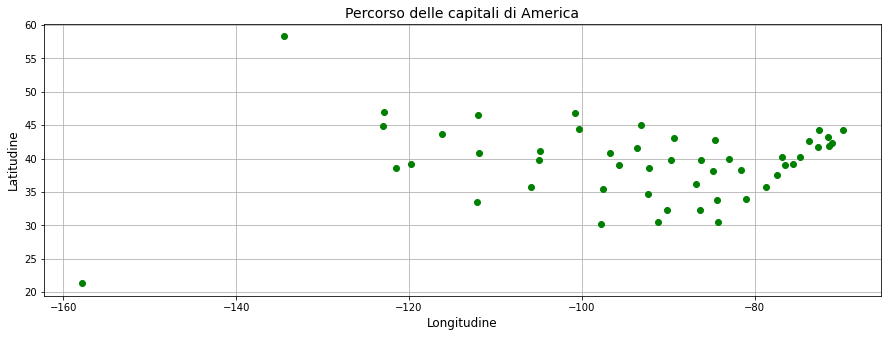

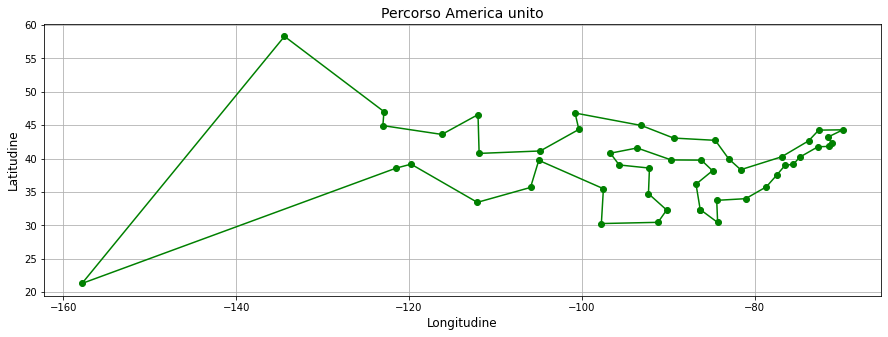

In [2]:
plt.figure(figsize=(15,5))
x, y = np.loadtxt("Dati/Coord_America.dat", usecols=(0,1), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='green', linestyle="")
plt.title('Percorso delle capitali di America', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.figure(figsize=(15,5))
x, y = np.loadtxt("Risultati_serie/best_path_America.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='green')
plt.title('Percorso America unito', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.show()

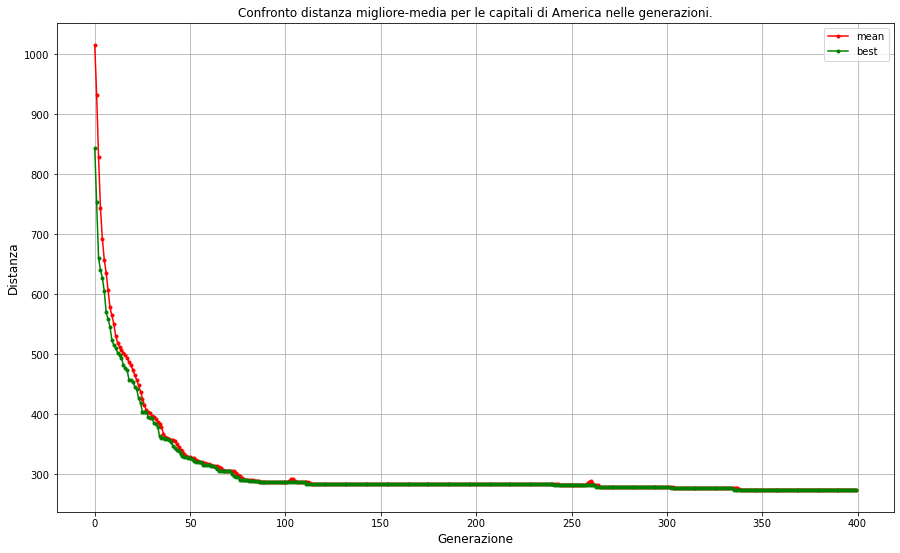

In [3]:
gen_a, best_a, mean_a = np.loadtxt("Risultati_serie/best_distance_America.dat", usecols=(0,1,2), delimiter='  ', 
                                    unpack='true')

plt.figure(figsize=(15,9))
plt.plot(gen_a,mean_a, marker='.', color='red', label='mean')
plt.plot(gen_a,best_a, marker='.', color='green', label='best')

plt.title('Confronto distanza migliore-media per le capitali di America nelle generazioni.')
plt.xlabel('Generazione', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.legend()
plt.grid(True)
plt.show()

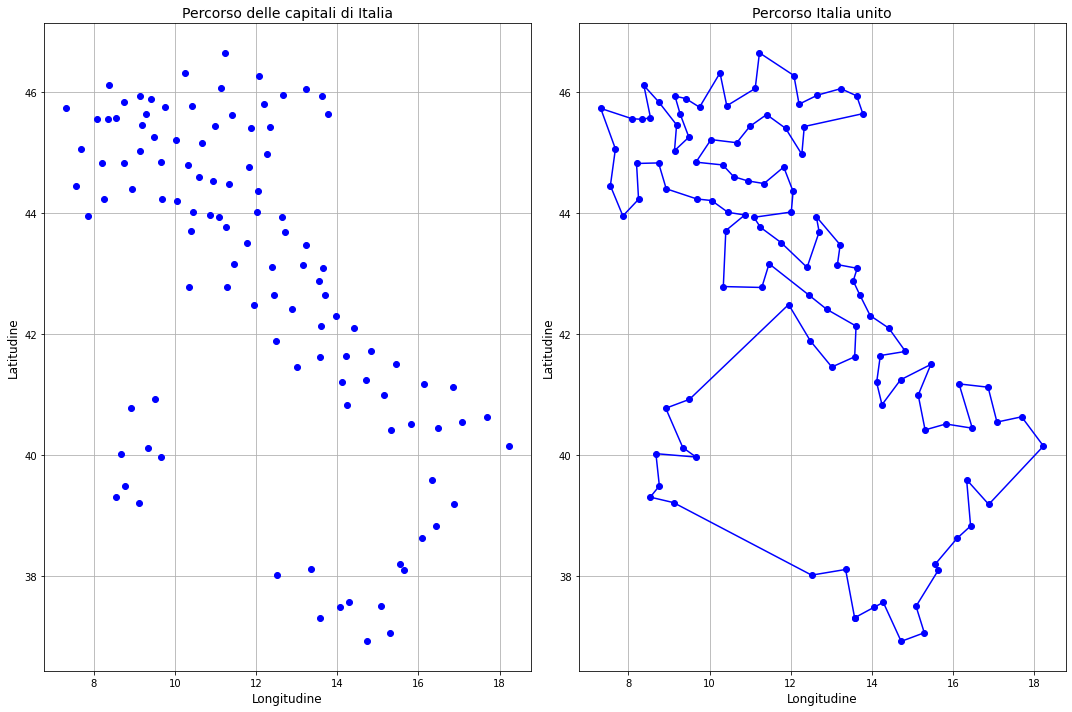

In [3]:
plt.figure(figsize=(15,10))

plt.subplot(121)
x, y = np.loadtxt("Dati/Coord_Italy.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y, marker='o', color='blue', linestyle="")
plt.title('Percorso delle capitali di Italia', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.subplot(122)
x, y = np.loadtxt("Risultati_serie/best_path_Italy.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='blue')
plt.title('Percorso Italia unito', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.tight_layout()
plt.show()

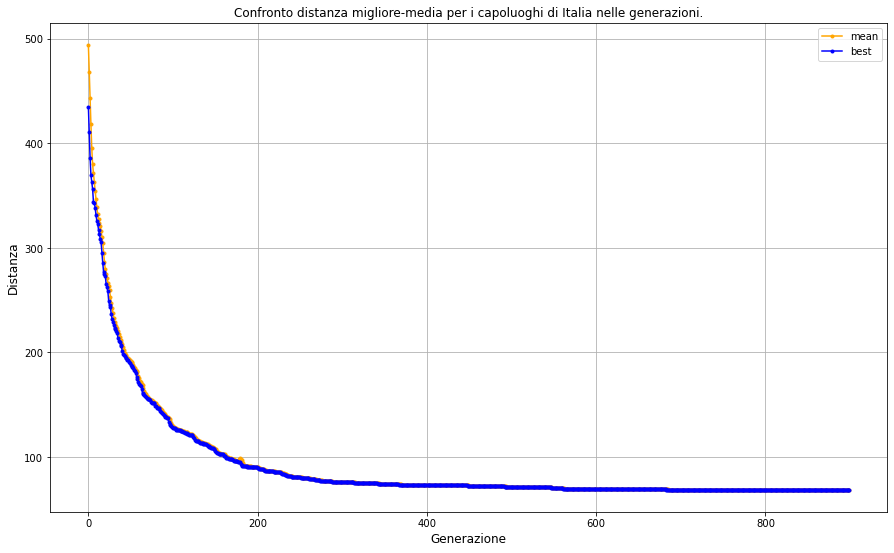

In [5]:
gen_i, best_i, mean_i = np.loadtxt("Risultati_serie/best_distance_Italy.dat", usecols=(0,1,2), delimiter='  ', 
                                     unpack='true')

plt.figure(figsize=(15,9))
plt.plot(gen_i,mean_i, marker='.', color='orange', label='mean')
plt.plot(gen_i,best_i, marker='.', color='blue', label='best')

plt.title('Confronto distanza migliore-media per i capoluoghi di Italia nelle generazioni.')
plt.xlabel('Generazione', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.legend()
plt.grid(True)
plt.show()

### Modifiche al codice per risolvere TSP

Per risolvere l'Esercitazione $10$ ho ripreso il codice scritto per l'Esercitazione $9$ ma ho praticato delle modifiche per adattarlo ai nuovi problemi proposti.

1. **Caricamento dei dati**. Nel codice dell'Esercitazione $9$ la funzione Input genera i dati che saranno le coordinate dei punti sulla circonferenza e nel quadrato e li invia direttamente alle altre funzioni che risolvono il problema del commesso viaggiatore. Nel codice dell'Esercitazione $10$ la funzione Input non genera più le coordinate dei punti perché vengono caricate dai rispettivi file esterni prodotti nell'Esercitazione $9$. In questo modo il codice potrà caricare anche le coordinate per risolvere il problema del commesso viaggiatore con le capitali d'America e con i capoluoghi d'Italia. 
2. **Seleziona il problema**. Il codice può risovere TSP per diversi file di dati di input a scelta dell'utente: chi usa il codice dovrà produrre i due file di dati, per le label e per le coordinate e modificare nel codice i nomi dei file in modo che carichi i dati proprio da quei file. Nel caso specifico di questa Esercitazione, il codice carica $5$ coppie di file relative ai problemi: 1: sette città, 2: sulla circonferenza, 3: nel quadrato, 4: capitali d'America, 5: capoluoghi d'Italia. Il codice risolve un problema alla volta, quindi gli altri $4$ sono commentati e sarà l'utente a modificare il commento in modo da scegliere quello desiderato. 
3. **Una sequenza random diversa per ogni nodo**. Ho modificato la funzione Input in modo che ogni nodo legga una riga diversa del file dei dati di input del seme del generatore. In questo modo ogni nodo genera una sequenza diversa di numeri casuali. Se così non fosse, tutti i nodi produrrebbero la stessa sequenza random e gli stessi dati di output e farebbero delle ricerche indipendenti tutte uguali: a questo punto, la parallelizzazione sarebbe inutile. 
4. **Codice in parallelo**. Per far funzionare un codice in parallelo è necessario introdurre la libreria mpi.h e richiamare nel main le sue funzioni. Ho usato: Initialize e Finalize per dire quando inizia e quando finisce il codice da eseguire in parallelo, Bcast (broadcast) affinché un nodo comunichi a tutti gli altri un'informazione sua personale, Send e Recv (receive) per inviare e ricevere dati da un nodo ad un altro, Reduce per svolgere un'operazione con dei dati provenienti da tutti i nodi; in questo caso, per confrontare i risultati finali di tutti i nodi e decidere chi è il minimo.
5. **Estrazioni dei nodi sender e receiver**. Il nodo $0$ è il nodo principale, ossia quello che comunicherà i dati del problema. Inoltre è incaricato di estrarre ogni $N_{migr}$ generazioni quale nodo invierà il suo best e chi lo riceverà e lo comunica grazie alla funzione Bcast. Viene inviato un best alla volta e lo scambio è casuale: i numeri relativi ai nodi sono estratti a sorte. Uso la distribuzione Rannyu che può estrarre tutti gli elementi con la stessa probabilità. 
6. **Scompattare e inviare l'informazione**. Il best che migra è un oggetto di classe Trip. Le funzioni di Mpi non consentono di inviare o ricevere oggetti che siano classi qualsiasi scritte dall'utente, ma solo di vettori di elementi semplici, come interi o double. Per questo ho deciso di scompattare il vector di City, fatto di tre componenti, interi, double e double, in tre vettori di interi, double e double. I tre vettori rappresentano label, longitudine e latitudine delle città. Compie questo processo sender rank. Ogni vettore viene inviato grazie alla funzione Send, al receiver rank. 
7. **Ricevere e ricomporre l'informazione**. Grazie alla funzione Recv, receiver rank riceve i tre vettori di interi, double e double che gli ha inviato sender rank. In ogni vettore i dati sono nell'ordine che appartiene al best migrante. A questo punto prima costruisco un vector di City aggiungendo in coda una alla volta le città nell'ordine in cui arrivano, poi lo trasformo in un elemento Trip, fornendogli tutte le funzioni che appartengno alla classe Trip. 
8. **E' arrivato il nuovo best**. Infine il nuovo best prende il posto di quello che c'era prima nella popolazione. Non sappiamo però come sia il nuovo best in relazione agli altri: potrebbe essere migliore o peggiore, sia del vecchio best sia di qualsiasi altro elemento della popolazione. Per questo non lascio il nuovo best all'inizio del vector Trip population, posto che tocca al percorso più breve e ordino la poplazione in ordine crescente della distanza. 
9. **Quale nodo comunica il risultato**. Ogni nodo dopo aver svolto la sua ricerca indipendente, avrà trovato il suo best. Tra tutte queste soluzioni la più interessante è la più piccola, ossia la migliore soluzione al problema. Ho scritto una parte di codice relativa alla comunicazione collettiva tra i nodi in cui chi sa di aver trovato la soluzione più piccola, la comunica scrivendo i risultati su due file esterni: distanza del best ad ogni generazione e best finale.

Infine modifico anche il Makefile in modo che sia adatto alla programmazione in parallelo. Per risolvere i problemi uso $10$ nodi dei $12$ totali della macchina.

### <span style="color:blue">  Esercizio 10.2 </span> 
<span style="color:blue"> 1a. **Applica il codice** modificato **in parallelo** e con lo scambio del best ogni $N_{migr}$ generazioni, per risolvere TSP con i $110$ capoluoghi di provincia d'Italia. **Come migliora il risultato rispetto** allo svolgimento con il codice dell'algoritmo genetico **non in parallelo**? </span>

Ho applicato il codice modificato in parallelo per risolvere i quattro problemi: sulla circonferenza e nel quadrato (test), capitali d'America, capoluoghi d'Italia. Inizio ad illustrare i risultati per i primi due problemi per testare il corretto funzionamento del codice modificato. Per quanto riguarda il problema sulla circonferenza, trovo lo stesso best del caso di GA non in parallelo, ma in $90$ generazioni anziché in $130$, quindi ho ottenuto un miglioramento. Per quanto riguarda il problema nel quadrato, trovo a sorpresa un nuovo best, migliore rispetto al caso di GA non in parallelo. Riporto il confronto tra i due grafici.

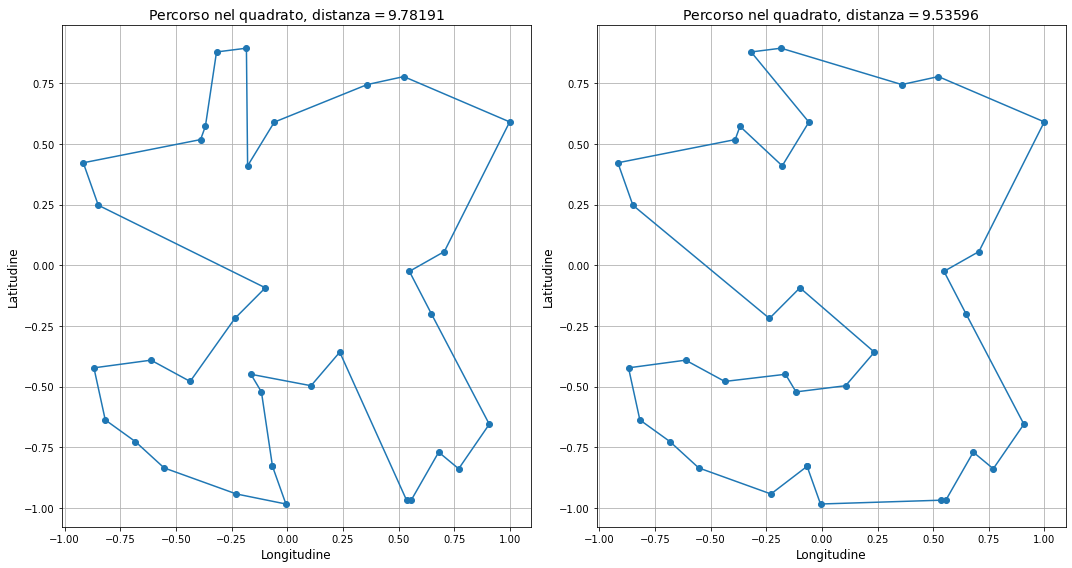

In [3]:
plt.figure(figsize=(15,8))

plt.subplot(121)
x, y = np.loadtxt("Risultati_serie/best_path_square.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o')
plt.title('Percorso nel quadrato, distanza$=9.78191$', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.subplot(122)
x, y = np.loadtxt("Risultati_parallelo/best_path_square.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o')
plt.title('Percorso nel quadrato, distanza$=9.53596$', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.tight_layout()
plt.show()

Svolgendo questo test trovo non solo che il **codice funziona correttamente**, ma anche che i **risultati migliorano**. Quindi posso applicare il codice modificato per GA in parallelo per risolvere TSP per le capitali d'America e per i capoluoghi di provincia d'Italia.

<span style="color:blue"> a. TSP per le capitali d'America. </span> 

Nei casi non in parallelo e in parallelo trovo due percorsi diversi che hanno distanza rispettivamente $274.331$ e $269.22$. Trovo il best intorno alla generazione rispettivamente $340$ e $780$. Nel caso in parallelo ho usato $N_{migr}=20$ con $1000$ generazioni anziché $500$. Ecco il grafico del confronto tra i due percorsi.

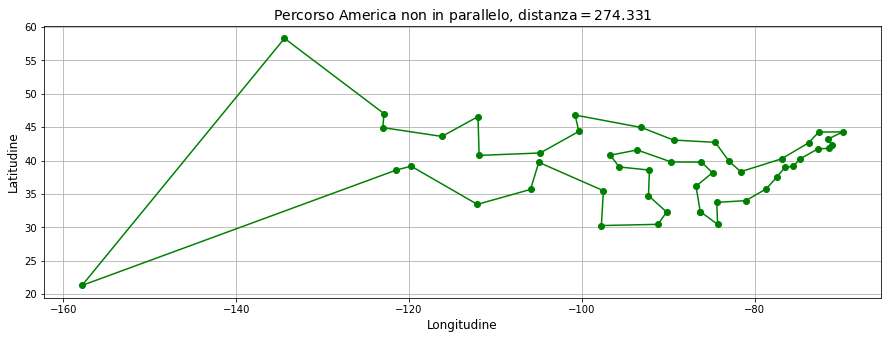

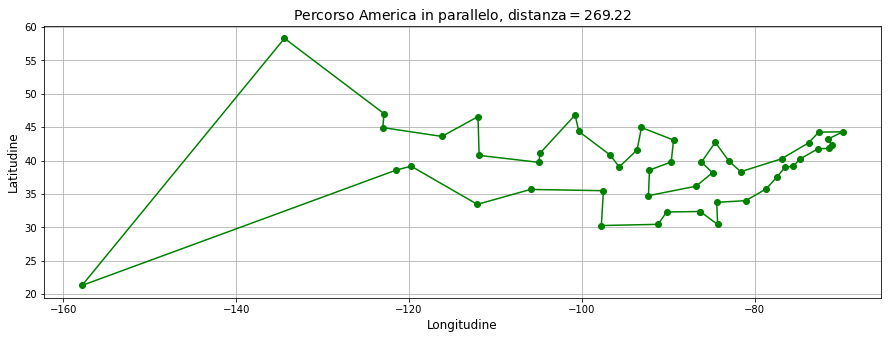

In [6]:
plt.figure(figsize=(15,5))
x, y = np.loadtxt("Risultati_serie/best_path_America.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='green')
plt.title('Percorso America non in parallelo, distanza$=274.331$', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.figure(figsize=(15,5))
x, y = np.loadtxt("Risultati_parallelo/best_path_America.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='green')
plt.title('Percorso America in parallelo, distanza$=269.22$', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.show()

Parallelizzando il codice si ottengono due miglioramenti. Il primo è il tempo di esecuzione: nel caso non in parallelo impiegava $3$ minuti mentre nel caso in parallelo impiega $2$ minuti, nonostante ci siano più del doppio delle generazioni da calcolare e il processo dello scambio del best. Il secondo miglioramento e più importante è che grazie allo scambio del best periodicamente, si trova un percorso finale più corto.

Aprendo il file dei dati di output con le distanze del best nelle generazioni si osserva un fatto curioso: $5$ nodi su $10$ hanno trovato il minimo e tutti i $5$ *vincitori* hanno scritto nel file di output. Il file è un po' *pasticciato*: si trovano delle sovrapposizioni di dati, ma si capisce quale sia la lunghezza finale del best.

<span style="color:blue"> b. TSP per i capoluoghi di provincia d'Italia. </span> 

Come per il caso precedente, anche in questo problema trovo due **risultati diversi** per i due casi e sono **migliori per** l'algoritmo genetico **in parallelo**. 

Il primo miglioramento che ho notato è il **tempo** di esecuzione. Nel caso non in parallelo la macchina impiegava $36$ minuti per risolvere il problema per $900$ generazioni. Nel caso in parallelo impiega $27$ minuti per $1050$ generazioni. Inoltre in questo caso ogni $N_{migr}=15$ generazioni avviene lo scambio del best: la macchina ha impiegato meno tempo in parallelo nonstante avesse un compito in più da svolgere e $150$ generazioni in più da calcolare. 

Il secondo e più importante miglioramento è che **trovo un best migliore**. Nel caso non in parallelo il best ha distanza $=68.7977$ e lo trova alla generazione $683$, mentre nel caso in parallelo il best ha distanza $=64.9516$ e lo trova alla generazione $1010$: ci ha messo un po' di più ma ha trovato il best più giusto.

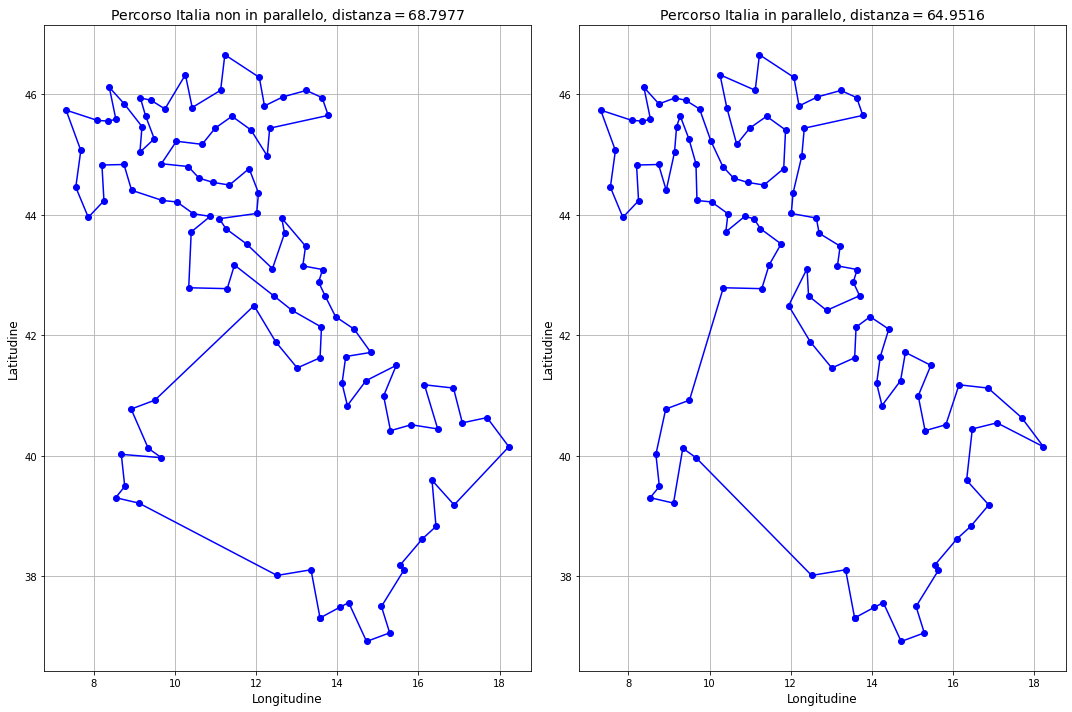

In [2]:
plt.figure(figsize=(15,10))

plt.subplot(121)
x, y = np.loadtxt("Risultati_serie/best_path_Italy.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='blue')
plt.title('Percorso Italia non in parallelo, distanza$=68.7977$', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.subplot(122)
x, y = np.loadtxt("Risultati_parallelo/best_path_Italy.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='blue')
plt.title('Percorso Italia in parallelo, distanza$=64.9516$', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.tight_layout()
plt.show()

Il nodo che **comunica i risultati finali** della propria ricerca è il nodo che **sa di aver trovato la soluzione più piccola**. Ogni nodo svolge la sua ricerca indipendente del best, ma **ogni $N_{migr}=15$ generazioni, un nodo** selezionato a sorte, **invia il suo best ad un altro nodo**, anche lui selezionato a sorte. Tutti i $10$ nodi possono essere **selezionati con la stessa probabilità sia per inviare** il proprio best **sia per ricevere** il best di un altro nodo. Grazie allo svolgimento del processo in parallelo **si giungerà prima alla soluzione più giusta** perché:

1. se da un altro continente **arriva un best migliore del suo**: questo diventa il nuovo best che si riprodurrà con una probabilità più alta e per più volte e la convergenza alla soluzione più giusta in assoluto si realizzerà al più presto;
2. se da un altro continente **arriva un best che è nella metà dei migliori**: avrà buone probabilità di riprodursi favorendo la ricerca della soluzione giusta;
3. se da un altro continente **arriva un best al di sotto della media**: non crea disagio e avrà poche possibilità di riprodursi, ma è raro che accada.

Gli **scambi nel gruppo** di tutti i nodi sono importanti affinché le **soluzioni trovate** da ciascun nodo siano **sempre più vicine tra di loro**, in modo da convergere tutte alla soluzione più giusta per il problema. Se i nodi si scambiano il best, sanno che cosa succede negli altri nodi e se uno ha delle soluzioni molto diverse si uniformerà agli altri. Nel corso delle generazioni tutti gli elementi di tutti i continenti si uniformeranno agli altri. 

In questo caso **due nodi** trovano il best assoluto: se si guarda il file originale del percorso migliore, si nota che è scritto due volte perché ciascun nodo ha scritto il suo best che è lo stesso. Il file con la distanza del best e della media della metà migliore invece non è disordinato come per il caso precedente, quindi di seguito propongo il grafico dell'evoluzione di queste due quantità nel corso delle $1050$ generazioni.

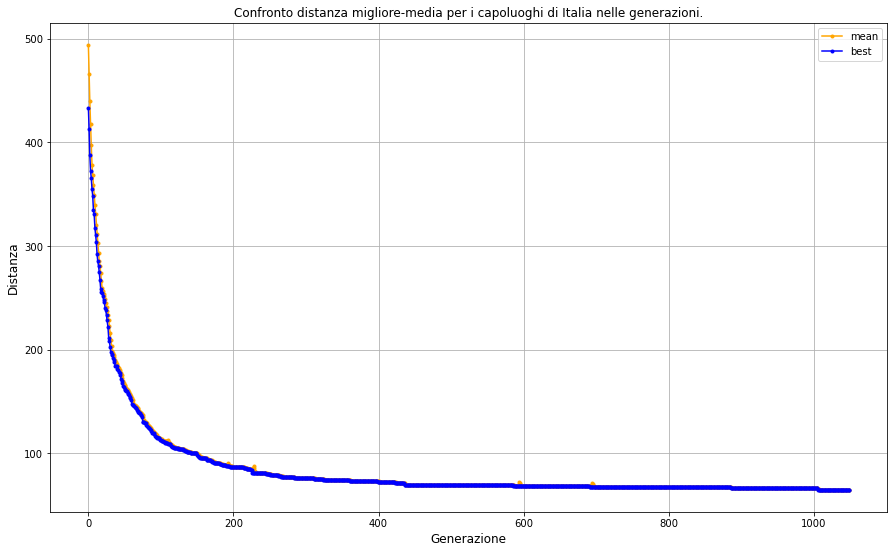

In [4]:
gen_p, best_p, mean_p = np.loadtxt("Risultati_parallelo/best_distance_Italy.dat", usecols=(0,1,2), delimiter='  ', 
                                     unpack='true')

plt.figure(figsize=(15,9))
plt.plot(gen_p,mean_p, marker='.', color='orange', label='mean')
plt.plot(gen_p,best_p, marker='.', color='blue', label='best')

plt.title('Confronto distanza migliore-media per i capoluoghi di Italia nelle generazioni.')
plt.xlabel('Generazione', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.legend()
plt.grid(True)
plt.show()

<span style="color:blue"> 1b. I risultati ottenuti con i **processi indipendenti che comunicano** ogni $N_{migr}$ il best, **è migliore rispetto** alle ricerche GA **completamente indipendenti**? </span> 

La richiesta di questo esercizio è sapere che cosa succede se si esegue lo **stesso esercizio** di prima ma **eliminando lo scambio del best** ogni $N_{migr}$ generazioni: in questo modo le ricerche dei nodi sono completamente indipendenti. Infine confrontare i risultati delle due ricerche. 

Il codice stampa sul terminale i risultati finali di tutti i nodi. Segue il grafico con i risultati del best finale per ogni nodo nel caso in parallelo con scambio.

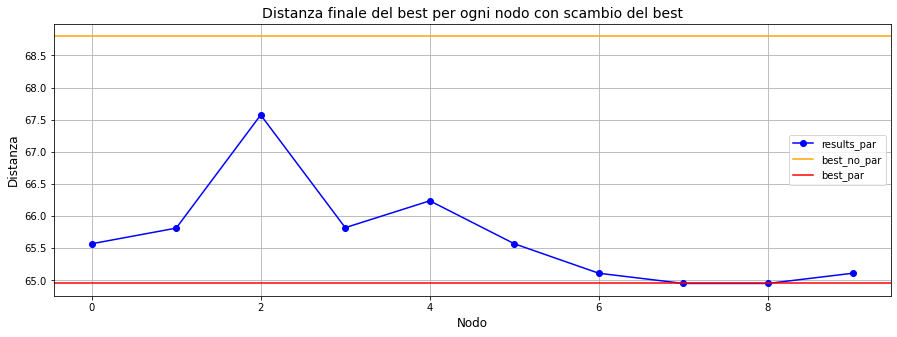

In [12]:
plt.figure(figsize=(15,5))
x, y = np.loadtxt("Risultati_parallelo/Final_Italy_exchange.dat", usecols=(0,1), delimiter='  ', unpack='true')

plt.plot(x,y, marker='o', color='blue', label='results_par') #Punti con le distanze finali.
plt.axhline(y=68.7977, color='orange', label='best_no_par') #Retta del risultato non in parallelo.
plt.axhline(y=64.9516, color='red', label='best_par') #Retta del best assoluto in parallelo.

plt.title('Distanza finale del best per ogni nodo con scambio del best', fontsize=(14))
plt.xlabel('Nodo', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.legend()
plt.grid(True)
plt.show()

La riga in alto arancione rappresenta il minimo ottenuto dal processo non in parallelo, mentre la riga rossa in basso è il minimo trovato da $2$ nodi su $10$ durante il processo in parallelo. Osserviamo che la discrepanza tra i due migliori risulati e il peggiore è di $2.5$ punti circa e che tutti i risultati trovati in parallelo sono più piccoli del risultato non in parallelo. Possiamo dire che sicuramente il **processo in parallelo porta ad un miglioramento** della soluzione. 

Adesso andiamo ad indagare che cosa succede se si toglie la comunicazione del best tra i nodi. Rieseguo lo stesso codice di prima commentando la parte relativa allo scambio del best tra i nodi. Segue il grafico con i risultati dei best finali per ogni nodo.

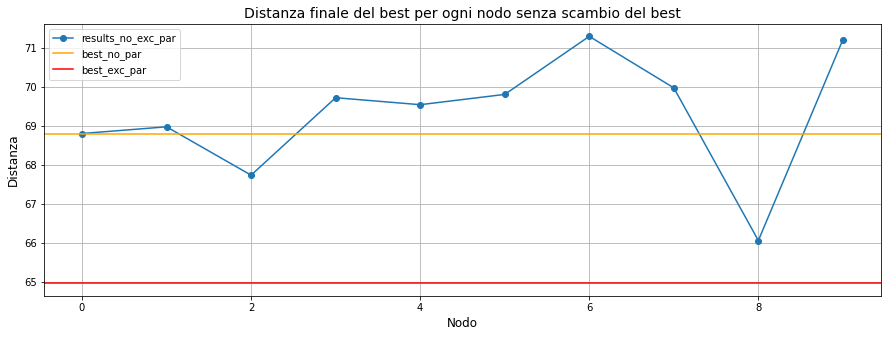

In [2]:
plt.figure(figsize=(15,5))
x, y = np.loadtxt("Risultati_parallelo/Final_Italy_no_exchange.dat", usecols=(0,1), delimiter='  ', unpack='true')

plt.plot(x,y, marker='o', label='results_no_exc_par') #Punti con le distanze finali senza scambio del best.
plt.axhline(y=68.7977, color='orange', label='best_no_par') #Retta del risultato non in parallelo.
plt.axhline(y=64.9516, color='red', label='best_exc_par') #Retta del best assoluto in parallelo.

plt.title('Distanza finale del best per ogni nodo senza scambio del best', fontsize=(14))
plt.xlabel('Nodo', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.legend()
plt.grid(True)
plt.show()

**Osservazioni**.

1. Il risultato del best del nodo $0$ è lo stesso del processo non in parallelo: $68.7977$. I due hanno usato la stessa sequenza del generatore. Tutti questi processi sono indipendenti e la macchina che ha eseguito la simulazione è la stessa con lo stesso processore, quindi questo risultato doveva ritornare. 
2. I risultati dei processi in parallelo non comunicanti sono peggiori rispetto a quelli in parallelo con scambio periodico del best. 
3. Tutti i risultati dei processi in parallelo non comunicanti sono maggiori del best assoluto dei processi in parallelo comunicanti che vale $64.9516$.
4. Solo $2$ dei $10$ risultati dei processi in parallelo non comunicanti sono migliori del best del processo non in parallelo. 
5. La discrepanza tra i risultati migliore e peggiore del caso nodi non comunicanti è di $5$ punti, il doppio rispetto al caso nodi comunicanti. 

Segue un grafico di confronto tra i best dei processi in parallelo ottenuti nei casi comunicanti e non comunicanti e best del processo non in parallelo.

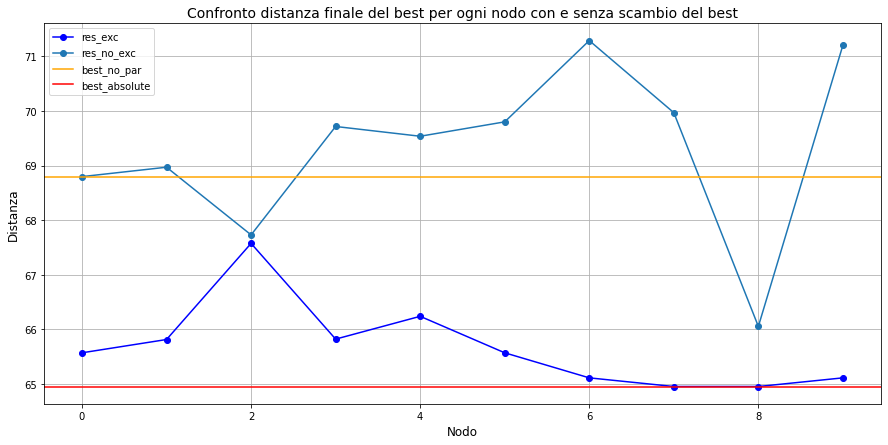

In [5]:
n, f = np.loadtxt("Risultati_parallelo/Final_Italy_exchange.dat", usecols=(0,1), delimiter='  ', unpack='true')
g = np.loadtxt("Risultati_parallelo/Final_Italy_no_exchange.dat", usecols=(1), delimiter='  ', unpack='true')

plt.figure(figsize=(15,7))

plt.plot(n,f, marker='o', color='blue', label='res_exc') #Punti con le distanze finali con scambio del best.
plt.plot(n,g, marker='o', label='res_no_exc') #Punti con le distanze finali senza scambio del best.

plt.axhline(y=68.7977, color='orange', label='best_no_par') #Retta del risultato non in parallelo.
plt.axhline(y=64.9516, color='red', label='best_absolute') #Retta del best assoluto in parallelo.

plt.title('Confronto distanza finale del best per ogni nodo con e senza scambio del best', fontsize=(14))
plt.xlabel('Nodo', fontsize=(12))
plt.ylabel('Distanza', fontsize=(12))

plt.legend()
plt.grid(True)
plt.show()

### Conclusioni

Dal grafico si osserva che **tutti i risultati dei nodi non comunicanti stanno sopra** rispetto a quelli in cui i nodi, durante lo svolgimento della simulazione, periodicamente si sono scambiati il best. Quindi possiamo rispondere alla domanda dicendo che, mantenendo lo stesso numero di core che fanno le ricerche indipendenti con l'algoritmo genetico GA, **se si applica lo scambio del best** ogni certo numero di generazioni, si ottiene un **miglioramento** non solo della **soluzione finale assoluta** di tutta la simulazione, ma anche delle soluzioni finali di ogni singolo core. 

### Giriamo l'Italia

Ora che abbiamo risolto questo esercizio, possiamo aiutare il commesso viaggiatore a raggiungere tutti i capoluoghi di provincia d'Italia, in modo che il percorso sia il più breve possibile, che egli visiti tutte le città una sola volta, che non ci siano incroci durante il percorso e che il punto di arrivo coincida con il punto di partenza. Essendo il percorso chiuso, uno può cominciare da dove vuole. Segue un grafico di confronto tra tre cartine con i capoluoghi d'Italia. 

Il primo mostra il percorso più breve trovato grazie alle ricerche GA indipendenti di $10$ nodi che lavorano in parallelo e che si scambiano il best ogni $N_{migr}$ generazioni. Il secondo mostra le città nelle loro coordinate $x$ e $y$, con accanto un numero che è l'etichetta del loro nome. Nel file *prov_ita.txt* si trovano i nomi delle città con accanto a sinistra il numero corrispondente. Il terzo grafico mette i primi due insieme ed è più grande. Buon viaggio!

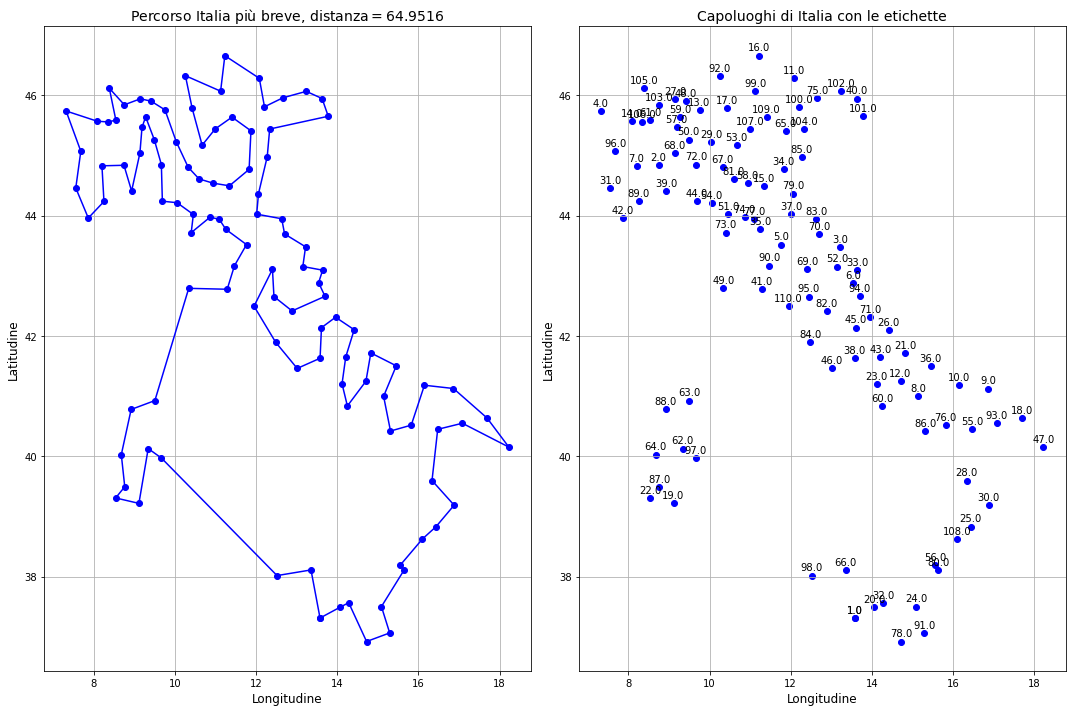

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(121)
x, y = np.loadtxt("Risultati_parallelo/best_path_Italy.dat", usecols=(1,2), delimiter='  ', unpack='true')
plt.plot(x,y, marker='o', color='blue')
plt.title('Percorso Italia più breve, distanza$=64.9516$', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.subplot(122)
n, x, y = np.loadtxt("Risultati_parallelo/best_path_Italy.dat", usecols=(0,1,2), delimiter='  ', unpack='true') 
plt.scatter(x, y, color='blue', marker='o')

for i, label in enumerate(n):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center')
    
plt.title('Capoluoghi di Italia con le etichette', fontsize=(14))
plt.xlabel('Longitudine', fontsize=(12))
plt.ylabel('Latitudine', fontsize=(12))
plt.grid(True)

plt.tight_layout()
plt.show()

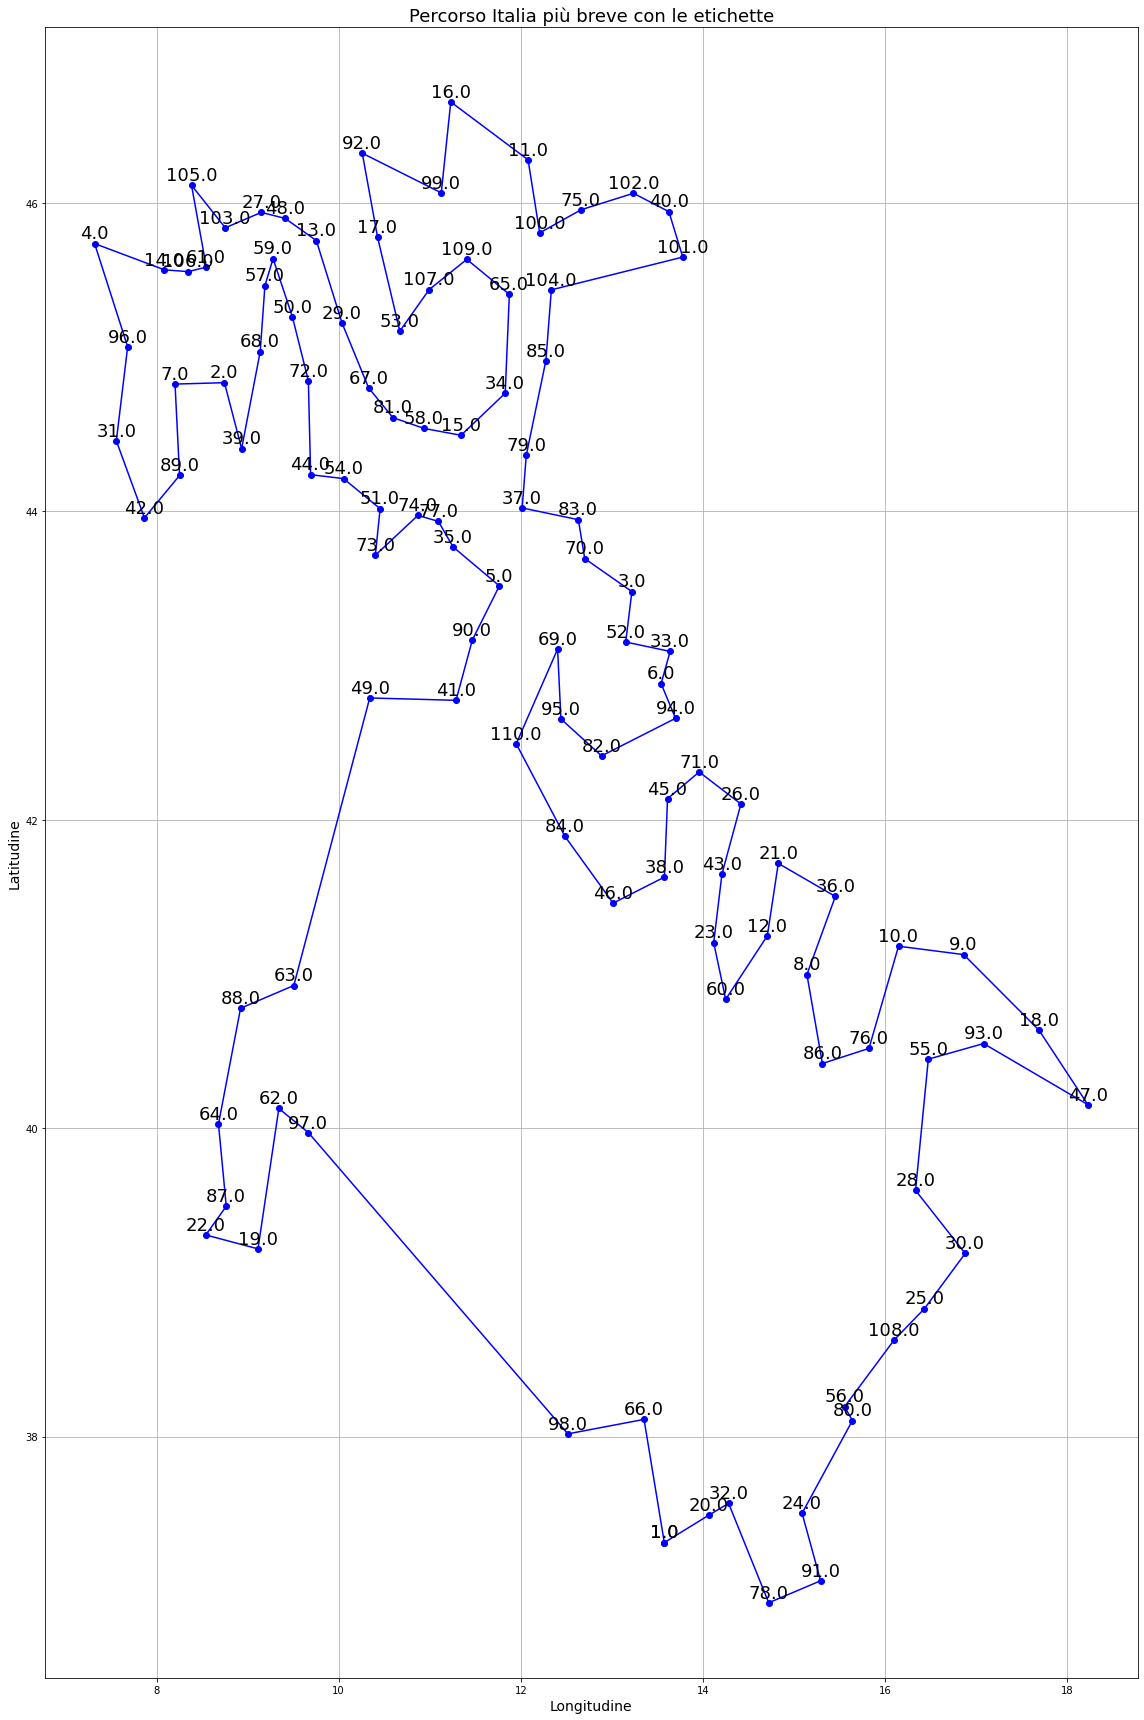

In [10]:
plt.figure(figsize=(16,24))

n, x, y = np.loadtxt("Risultati_parallelo/best_path_Italy.dat", usecols=(0,1,2), delimiter='  ', unpack='true') 
plt.plot(x,y, marker='o', color='blue')

for i, label in enumerate(n):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=(18))
    
plt.title('Percorso Italia più breve con le etichette', fontsize=(18))
plt.xlabel('Longitudine', fontsize=(14))
plt.ylabel('Latitudine', fontsize=(14))
plt.grid(True)

plt.tight_layout()
plt.show()